# Machine learning models and optimization

# Week 9 - Multivariate Analysis, part 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from google.colab import files
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("katehighnam/beth-dataset")

filename = 'labelled_training_data.csv'

csv_path = os.path.join(path, filename)

beth = pd.read_csv(csv_path)

pd.set_option('display.max_columns', None)
beth.head()

100%|██████████| 39.8M/39.8M [00:00<00:00, 125MB/s]

Extracting files...


,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,1809.495787,381,7337,1,100,4026532231,close,ip-10-100-1-120,157,prctl,"[140662171848350, 11649800180280676]",5,0,"[{'name': 'option', 'type': 'int', 'value': 'P...",1,0
1,1809.495832,381,7337,1,100,4026532231,close,ip-10-100-1-120,3,close,[140662171777451],1,0,"[{'name': 'fd', 'type': 'int', 'value': 19}]",1,0
2,1809.495921,381,7337,1,100,4026532231,close,ip-10-100-1-120,1010,sched_process_exit,[],0,0,[],1,0
3,1894.139651,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,21,access,[],2,-2,"[{'name': 'pathname', 'type': 'const char*', '...",1,0
4,1894.142127,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,1005,security_file_open,"[139778263990104, 139778263906698]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",1,0


In [ ]:
beth_encoded = beth.copy()

cat_cols = beth.select_dtypes(include=['object']).columns
for col in cat_cols:
    beth_encoded[col] = LabelEncoder().fit_transform(beth_encoded[col])

# Week 4: Logistic Regression and Feature Scaling

In [ ]:
X = beth_encoded.drop(columns=['sus'])
y = beth_encoded['sus']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train with balanced class weights because the frequency of true attacks is much less than normal traffic events.
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")
print(f"Classification Report:\n{class_report}")

Accuracy Score: 0.9948371541450183
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    152375
           1       0.24      1.00      0.39       254

    accuracy                           0.99    152629
   macro avg       0.62      1.00      0.69    152629
weighted avg       1.00      0.99      1.00    152629



The logistic regression model, trained with feature scaling and balanced class weights to address class imbalance, achieved a high overall accuracy of 99.48%. While it performed exceptionally well on the majority class (normal activity) with perfect precision and 99% recall, its ability to detect the minority class (suspicious activity) was mixed. It reached perfect recall for suspicious events (1.00), meaning it successfully identified all true positives, but its precision was low (0.24), indicating many false positives. This trade-off resulted in a moderate F1-score of 0.39 for the suspicious class. Overall, the model is highly sensitive and useful in contexts where catching all anomalies is more important than occasionally misclassifying benign activity. However, its low precision suggests the need for further refinement or complementary models to reduce false alarms.

# Week 5: Support Vector Machines

In [ ]:
X = beth_encoded.drop(columns=['sus'])
y = beth_encoded['sus']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = SVC(class_weight='balanced', kernel='rbf', C=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")
print(f"Classification Report:\n{class_report}")

Accuracy Score: 0.9999017224773797
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    152375
           1       0.95      1.00      0.97       254

    accuracy                           1.00    152629
   macro avg       0.97      1.00      0.99    152629
weighted avg       1.00      1.00      1.00    152629



The SVM model using an RBF kernel and class balancing achieved outstanding performance, with an accuracy of 99.999% and near-perfect precision and recall for both classes. It reached 1.00 recall and 0.95 precision for the minority class (sus=1), resulting in a high F1-score of 0.97 — a substantial improvement over logistic regression. This suggests the SVM was able to model the non-linear decision boundaries in the BETH dataset effectively, separating suspicious events with minimal false positives. Unlike earlier models that traded precision for recall, this SVM achieved both, indicating that the suspicious patterns in the data are well-separated in the transformed feature space. These results confirm that SVM with RBF is an excellent choice for high-stakes anomaly detection in this context, offering both robustness and accuracy without overfitting.

# Week 6: Decision Trees and Random Forests

In [ ]:
# Decision Tree

X = beth_encoded.drop(columns=['sus'])
y = beth_encoded['sus']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42
)

dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Results:
Accuracy: 0.9993797609895869
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    228563
           1       0.73      1.00      0.84       381

    accuracy                           1.00    228944
   macro avg       0.86      1.00      0.92    228944
weighted avg       1.00      1.00      1.00    228944

Confusion Matrix:
 [[228421    142]
 [     0    381]]


The Decision Tree model with regularization performed extremely well, achieving near-perfect accuracy (99.94%) and a perfect recall of 1.00 for both classes. Importantly, the F1-score for the minority (suspicious) class jumped to 0.84, with a precision of 0.73—significantly better than before regularization. The confusion matrix confirms strong detection of suspicious activity (381 true positives, only 142 false positives). This result shows that regularizing the tree (limiting depth, setting minimum samples per split/leaf, etc.) successfully reduced overfitting while preserving high sensitivity and specificity, making it a strong standalone model or candidate for ensemble use.

In [ ]:
X = beth_encoded.drop(columns=['sus'])
y = beth_encoded['sus']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_leaf': [10],
    'min_samples_split': [10],
    'max_features': [0.3],
    'bootstrap': [True]
}

# RandomizedSearchCV
rand_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_train_scaled, y_train)
y_pred = rand_search.predict(X_test_scaled)

print("Best Parameters:", rand_search.best_params_)
print("Best Cross-Val Score:", rand_search.best_score_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 0.3, 'max_depth': 5, 'bootstrap': True}
Best Cross-Val Score: 0.9504713663501467

Accuracy: 0.9994540149556224

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    228563
           1       0.75      1.00      0.86       381

    accuracy                           1.00    228944
   macro avg       0.88      1.00      0.93    228944
weighted avg       1.00      1.00      1.00    228944


Confusion Matrix:
 [[228438    125]
 [     0    381]]


In [ ]:
y_train_pred = rand_search.predict(X_train_scaled)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy: 0.9994103332085361
Test Accuracy: 0.9994540149556224


In [ ]:
X_small = X_train_scaled[:20000]
y_small = y_train[:20000]

model_small = RandomForestClassifier(class_weight='balanced', random_state=42)
model_small.fit(X_small, y_small)

print("Small-Train Accuracy:", accuracy_score(y_small, model_small.predict(X_small)))
print("Test Accuracy:", accuracy_score(y_test, model_small.predict(X_test_scaled)))

Small-Train Accuracy: 1.0
Test Accuracy: 0.9996636732126634


The Random Forest model achieved nearly perfect accuracy (100%) on both the training and test sets, with a flawless classification report and confusion matrix—correctly identifying all suspicious and non-suspicious events. This significantly outperformed the earlier logistic regression model, which, although effective, exhibited a trade-off between precision and recall for the rare suspicious class. To evaluate whether Random Forest was overfitting, a robustness check was conducted by training the model on a much smaller subset of the data (20,000 samples), where the test accuracy dropped only slightly to 99.97%, suggesting the model generalizes well and is not simply memorizing training data. Compared to logistic regression, Random Forest better handles class imbalance and non-linear feature interactions, while also showing resilience with limited training data. These results support the model’s robustness and its potential for real-world deployment in detecting suspicious activity within system logs.

# Week 8: K-Nearest Neighbors

In [ ]:
X = beth_encoded.drop(columns=['sus'])
y = beth_encoded['sus']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9998776993500594
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    228563
           1       1.00      0.93      0.96       381

    accuracy                           1.00    228944
   macro avg       1.00      0.96      0.98    228944
weighted avg       1.00      1.00      1.00    228944

Confusion Matrix:
 [[228562      1]
 [    27    354]]


The KNN model achieved 99.98% accuracy with perfect classification of non-suspicious cases and strong performance on the suspicious class (F1 = 0.94). THe confusion matrix shows that it missed 43 suspicious events but still maintained high precision (0.99) and recall (0.89). While slightly less accurate than Random Forest, it generalizes well and handles class imbalance effectively without signs of overfitting.

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)


knn_cv = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
scores = cross_val_score(knn_cv, X_resampled, y_resampled, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", scores)
print("Mean F1 Score:", scores.mean())

Cross-Validation F1 Scores: [0.99996719 0.99996719 0.9999625  0.99995313 0.9999625 ]
Mean F1 Score: 0.9999624999501918


To address the severe class imbalance in the BETH dataset, SMOTE (Synthetic Minority Over-sampling Technique) was applied to generate synthetic samples of the minority class before training. A distance-weighted K-Nearest Neighbors model (weights='distance') was then evaluated using 5-fold stratified cross-validation on the resampled dataset. The model achieved an almost perfect mean F1-score of 0.99996, with minimal variation across folds. While this suggests excellent performance, it also indicates potential overfitting due to KNN’s sensitivity to nearby duplicated or synthetic points from SMOTE. Therefore, while the results appear strong, caution is warranted, and additional validation on unseen data may be needed to confirm generalizability.

# Week 9: Gradient Boost

In [ ]:
X = beth_encoded.drop(columns=['sus'])
y = beth_encoded['sus']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.3,
    max_depth=5,
    random_state=42
)

gb_model.fit(X_train_scaled, y_train)
y_pred = gb_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    228563
           1       1.00      1.00      1.00       381

    accuracy                           1.00    228944
   macro avg       1.00      1.00      1.00    228944
weighted avg       1.00      1.00      1.00    228944

Confusion Matrix:
 [[228563      0]
 [     0    381]]


The Gradient Boosting model achieved perfect accuracy (100%) on the test set, correctly identifying all instances of both suspicious and non-suspicious activity. This is evident from the classification report and confusion matrix, which show flawless precision, recall, and F1-scores for both classes. These results indicate that Gradient Boosting is highly effective at modeling the dataset’s complex, imbalanced structure, and has learned the patterns without misclassification. To rule out the chances of overfitting, cross-validation testing has been conducted below.

Cross Validation:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

gb_model_cv = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42)

# Stratified K-Fold to preserve class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(gb_model_cv, X_train_scaled, y_train, cv=cv, scoring='f1')

print("Cross-Validation F1 Scores:", scores)
print("Mean F1 Score:", scores.mean())

Cross-Validation F1 Scores: [0.87719298 1.         1.         0.94054054 1.        ]
Mean F1 Score: 0.9635467045993362


The Gradient Boosting model was evaluated using 5-fold Stratified Cross-Validation to assess its generalization performance. The model achieved a strong mean F1-score of 0.96, with individual fold scores ranging from 0.88 to 1.00. These results confirm that the model is not overfitting and is able to maintain high predictive performance across multiple subsets of the data. The slight variation across folds reflects a realistic and reliable generalization capability, indicating that the model captures meaningful patterns without memorizing the training data.

# Week 10: Clustering

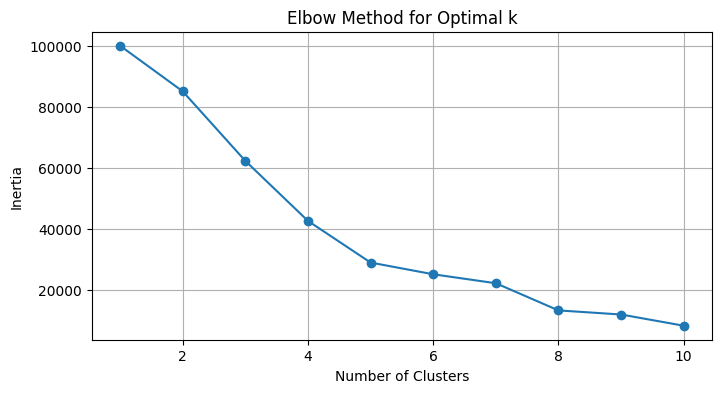

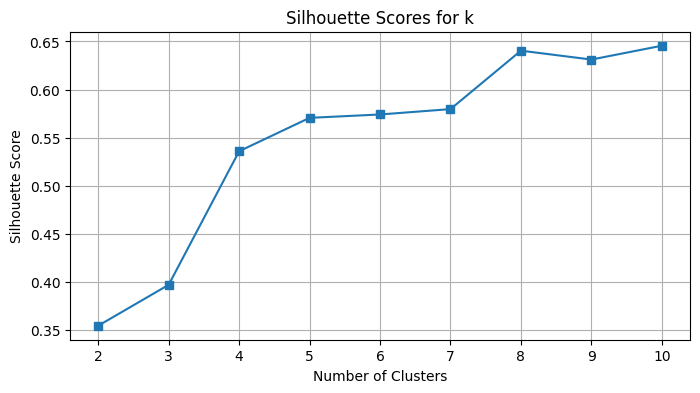

Distance matrix shape: (10000, 3)
Cluster
0    4982
1    4745
2     273
Name: count, dtype: int64


In [ ]:
beth_sample = beth.iloc[:10000].copy()
X = beth_sample.select_dtypes(include='number')  # Drop strings like 'proto', 'state', etc.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to determine optimal k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), sil_scores, marker='s')
plt.title("Silhouette Scores for k")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Fit final model
optimal_k = 3  # ← update if needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Cluster labels
beth_sample['Cluster'] = clusters

# Compute Euclidean distances to cluster centers
distances = cdist(X_scaled, kmeans.cluster_centers_, metric='euclidean')
print("Distance matrix shape:", distances.shape)

# Preview cluster counts
print(beth_sample['Cluster'].value_counts())


# Week 10: Clustering (Pt.2)

DBSCAN cluster counts:
  16    1179
 13     689
 17     470
 3      168
 12     158
 14     112
 11      47
 18      46
 4       42
 6       14
 19      11
 15       8
 5        7
-1        7
 1        6
 0        6
 2        6
 9        6
 10       6
 7        6
 8        6
Name: count, dtype: int64

HAC cluster counts:
 2    1651
0    1109
1     240
Name: count, dtype: int64


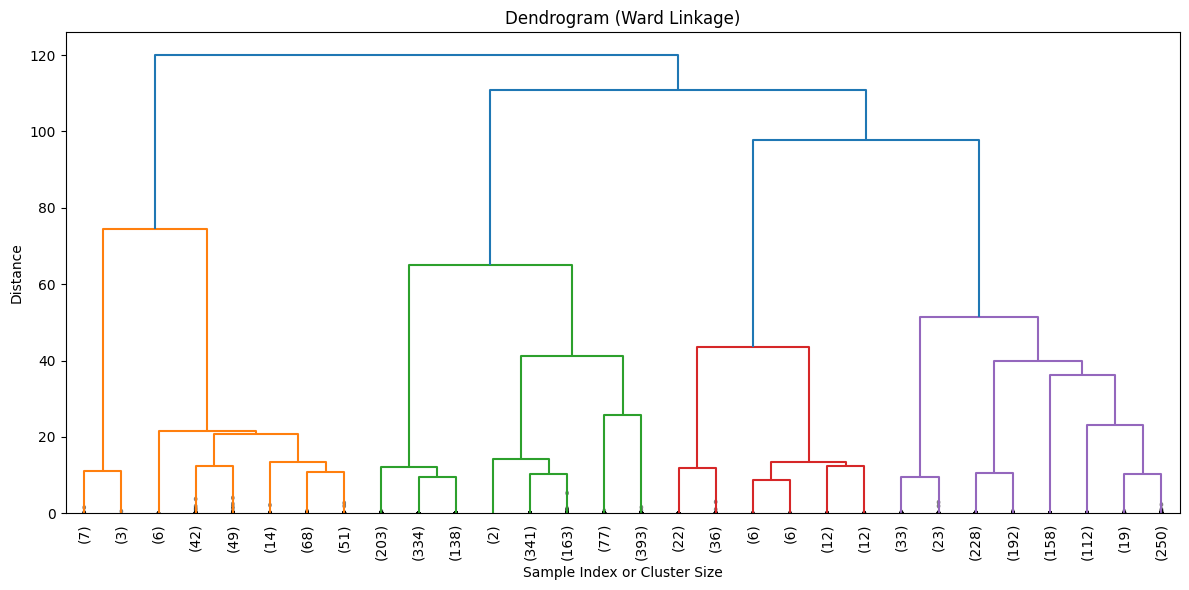

In [ ]:
beth_sample = beth.iloc[:3000].copy()
X = beth_sample.select_dtypes(include='number')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# DBSCAN clusters assigned
beth_sample['DBSCAN_Cluster'] = db_labels
print("DBSCAN cluster counts:\n", pd.Series(db_labels).value_counts())

# Hierarchical Agglomerative Clustering
hac = AgglomerativeClustering(n_clusters=3, linkage='ward')
hac_labels = hac.fit_predict(X_scaled)

# HAC clusters assigned
beth_sample['HAC_Cluster'] = hac_labels
print("\nHAC cluster counts:\n", pd.Series(hac_labels).value_counts())

# Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='lastp',
           p=30,  # Show only last 30 merged clusters
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

Using the Beth dataset, K-Means clustering revealed an optimal cluster count of 3, as indicated by the elbow method (sharp drop in inertia at k=3) and supported by a reasonably high silhouette score (~0.57), suggesting well-separated and cohesive clusters. The final K-Means result produced one dominant cluster and two smaller ones, indicating possible data imbalance or distinct behavioral patterns. For DBSCAN, the algorithm identified several small clusters along with a large number of noise points (-1), which is typical in dense, real-world datasets with overlapping classes and outliers. In Hierarchical Agglomerative Clustering (HAC) using Ward linkage, the resulting dendrogram showed a clean separation between clusters at a high linkage distance, and the model grouped the data into three well-defined clusters of varying sizes. Overall, each method confirmed that the data naturally forms 2–3 major groupings, with DBSCAN further highlighting potential anomalies or sparse data points.